# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile as z
from zipfile import ZipFile
vj="readonly/small_img.zip"
z.is_zipfile(vj)
with ZipFile(vj,'r') as zip_ref:
    zip_ref.extractall("readonly/o")
    

In [50]:
import zipfile as z
from zipfile import ZipFile
vjo="readonly/images.zip"
z.is_zipfile(vjo)
with ZipFile(vjo,'r') as zip_ref:
    zip_ref.extractall("readonly/op")
    

In [36]:
help(Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



In [46]:
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [47]:
import PIL
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpim
ent=os.listdir("readonly/o")
from PIL import Image,ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
ent=os.listdir("readonly/o")
import pytesseract
globa=[]
def search(img,op):
    width=10000
    wcent=int(width/int(img.size[0]))
    hsize=img.size[1]*wcent
    im=img.resize((width,hsize),PIL.Image.ANTIALIAS)
    text=pytesseract.image_to_string(im)
    text=text+op
    globa.append(text)
ent=os.listdir("readonly/o")
for i in ent:
    img=Image.open("readonly/o/"+str(i))
    #print(img.size)
    search(img,i)

In [48]:
from PIL import ImageDraw,ImageFont
font = ImageFont.truetype("readonly/fanwood-webfont.ttf",20)
def image(text):
    for j in globa:
        f=True
        j=j.split()
        if(text in j):
            temp="Results found in file "+str(j[len(j)-1][-7:])
            print(temp)
            flag=False
            im=cv.imread("readonly/o/"+str(j[len(j)-1][-7:]))
            gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
            face=face_cascade.detectMultiScale(gray,1.35,5)
            if(len(face)==0):
                print("But there were no faces in that file")
                break
            intf=len(face)%5
            if(intf==0):
                h=1
            else:
                h=2
            con=Image.new('RGB',(500,100*h))
            pil=Image.open("readonly/o/"+str(j[len(j)-1][-7:])).convert('RGB')
            cox=0
            coy=0
            for x,y,z,w in face:
                nd=pil.crop((x,y,x+z,y+w))
                nd=nd.resize((100,100))
                con.paste(nd,(cox,coy))
                cox=cox+100;
                if(cox==500):
                    cox=0
                    coy=coy+100
            display(con)
                
            
            
            
    
    
    
    

Results found in file a-3.png


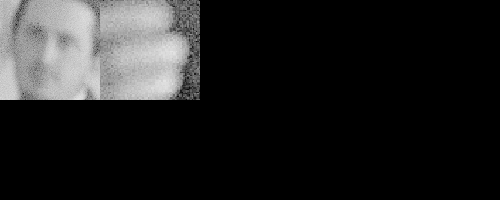

Results found in file a-0.png


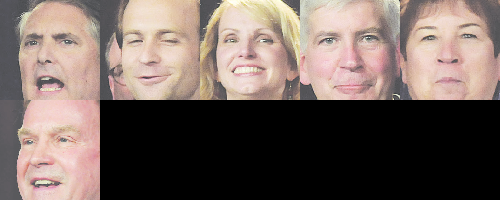

In [49]:
image("Christopher")

###### For image.zip

In [50]:
import PIL
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpim

from PIL import Image,ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
#ent=os.listdir("readonly/o")
import pytesseract
ent=os.listdir("readonly/op")

glo=[]
def search(img,op):
    width=10000
    wcent=int(width/int(img.size[0]))
    hsize=img.size[1]*wcent
    im=img.resize((width,hsize),PIL.Image.ANTIALIAS)
    text=pytesseract.image_to_string(im).replace('-/n','')
    text=text+op
    glo.append(text)
ent=os.listdir("readonly/op")
for i in ent:
    img=Image.open("readonly/op/"+str(i))
    #print(img.size)
    search(img,i)

In [51]:
from PIL import ImageDraw,ImageFont
font = ImageFont.truetype("readonly/fanwood-webfont.ttf",20)
def image(text):
    for j in glo:
        p=j
        j=j.split()
        #print(j[len(j)-1])
        if((text in j)|(text in p)):
            
            p=''
            j=j[len(j)-1]
            #print("true",j)
            for i in j[::-1]:
                if(i!='a'):
                    p=p+i
                else:
                    p=p+i
                    p=p[::-1]
                    break
            temp="Results found in file "+str(p)
            print(temp)
            flag=False
           
            im=cv.imread("readonly/op/"+str(p))
            gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
            face=face_cascade.detectMultiScale(gray,1.35,5)
            if(len(face)==0):
                print("But there were no faces in that file")
                continue
            intf=len(face)%5
            if(intf==0):
                h=1
            else:
                h=2
            con=Image.new('RGB',(500,100*h))
            pil=Image.open("readonly/op/"+str(p)).convert('RGB')
            cox=0
            coy=0
            for x,y,z,w in face:
                nd=pil.crop((x,y,x+z,y+w))
                nd=nd.resize((100,100))
                con.paste(nd,(cox,coy))
                cox=cox+100;
                if(cox==500):
                    cox=0
                    coy=coy+100
            display(con)
                
            
            
            
    
    
    
    

Results found in file a-3.png


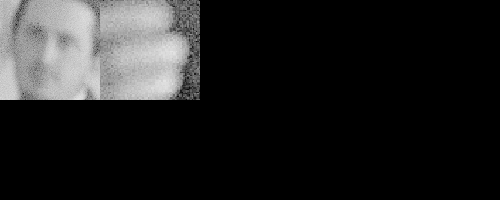

Results found in file a-10.png
But there were no faces in that file
Results found in file a-1.png


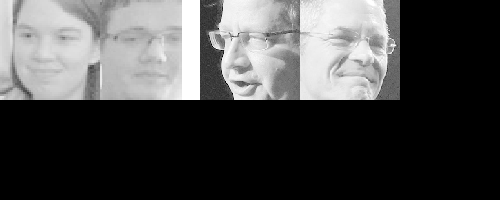

Results found in file a-0.png


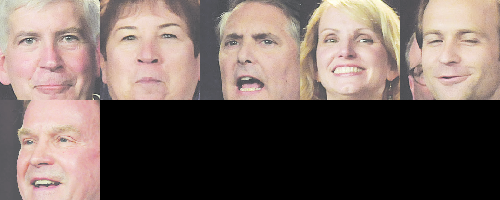

Results found in file a-8.png
But there were no faces in that file
Results found in file a-13.png


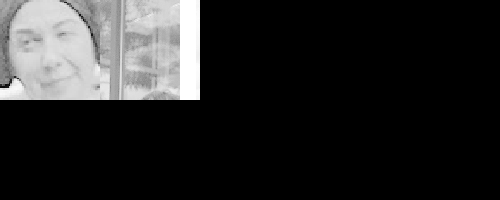

Results found in file a-2.png


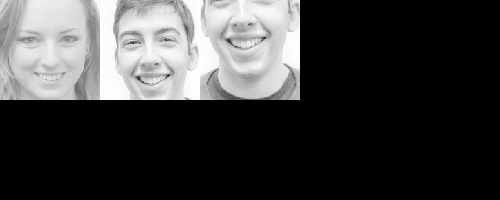

In [45]:
image("Mark")